<a href="https://colab.research.google.com/github/Shivamsingh354/Apriori-Algorithm---Project-On-Market-Basket-Analysis/blob/main/Apriori_Algorithm_Project_On_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Apyori to perform the Apriori algorithm

In [24]:
!pip install apyori

In [25]:
from apyori import apriori

# Importing the Datasets

LINK - 'https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv'

In [26]:
df  = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

# EDA - Explotary Data Analysis

In [27]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [29]:
df.shape

(38765, 3)

In [30]:
df.size

116295

In [31]:
df.ndim

2

In [32]:
df.isnull().sum()

,0
Member_number,0
Date,0
itemDescription,0


In [33]:
# Q1. Which of the items is the most selling item?
df.itemDescription.value_counts().head(10)

,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


Text(0.5, 1.0, 'Top10 Selling Items')

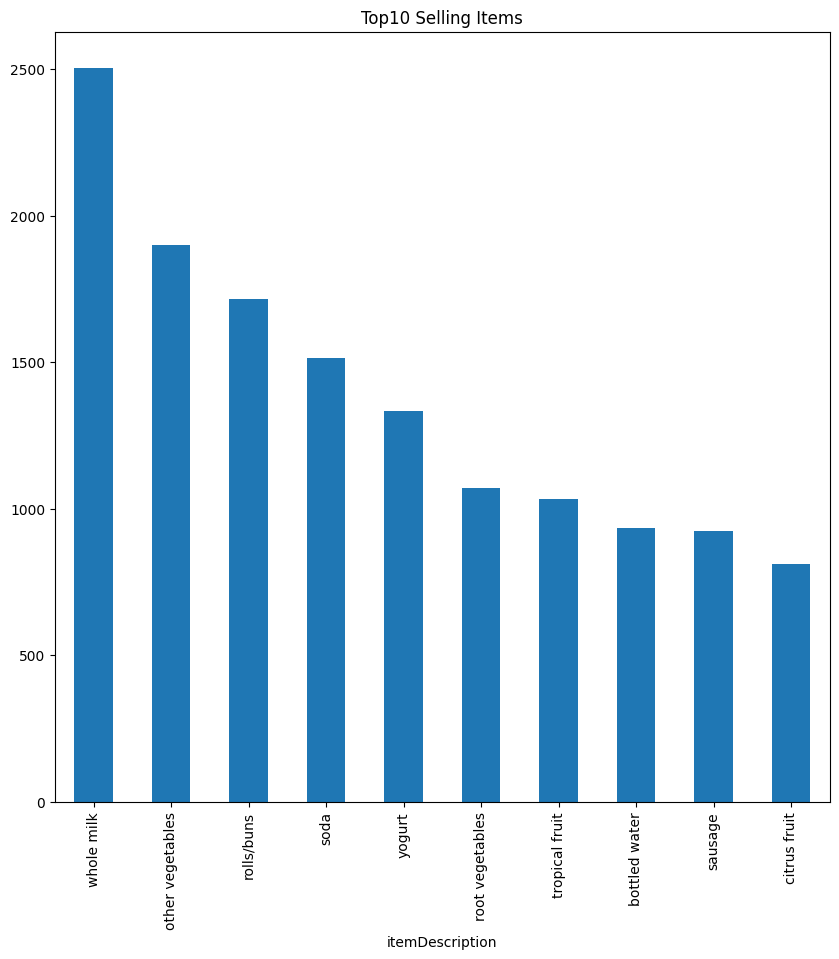

In [34]:
plt.figure(figsize=(10,10))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top10 Selling Items')

In [35]:
# Q1. Which of the items is the least selling item?
df.itemDescription.value_counts().sort_values().head(10)

,count
itemDescription,
preservation products,1
kitchen utensil,1
baby cosmetics,3
bags,4
rubbing alcohol,5
toilet cleaner,5
make up remover,5
frozen chicken,5
salad dressing,6


Text(0.5, 1.0, 'Least Selling Items')

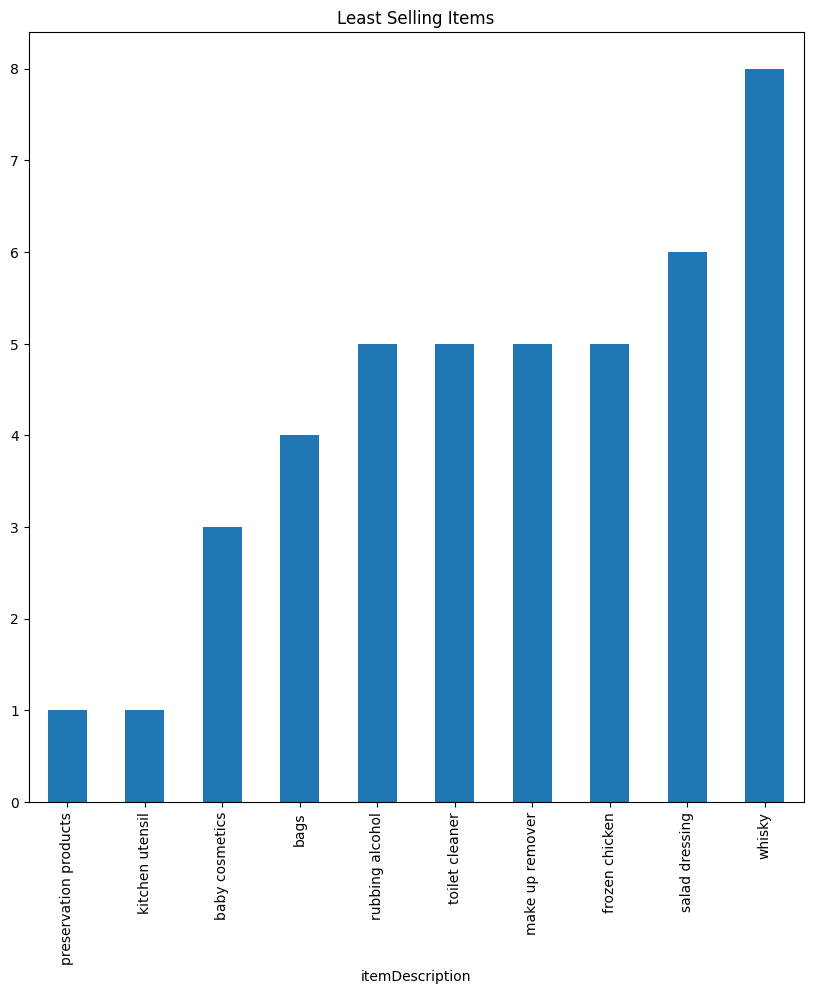

In [36]:
plt.figure(figsize=(10,10))
df.itemDescription.value_counts().sort_values().head(10).plot.bar()
plt.title('Least Selling Items')

In [37]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [38]:
# Q3. Top 10 Customer
df.Member_number.value_counts().head(10)

,count
Member_number,
3180,36
3737,33
3050,33
2051,33
3915,31
2433,31
2271,31
2625,31
3872,30


<Axes: xlabel='Member_number'>

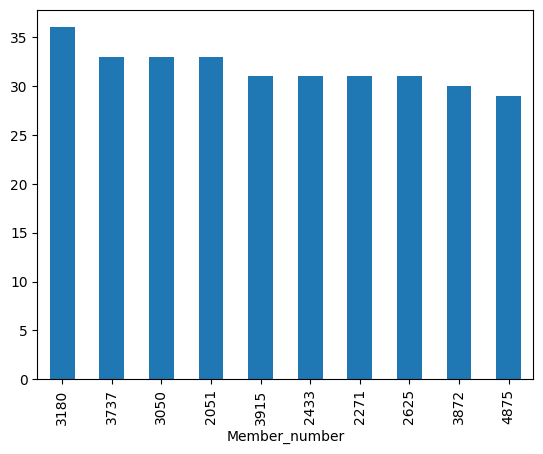

In [39]:
df.Member_number.value_counts().head(10).plot.bar()

In [40]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [41]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [42]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [43]:
# Q4. Which yesr majorirty of the transaction happen
df.Year.value_counts()

,count
Year,
2015,20488
2014,18277


In [44]:
df.Month.value_counts()

,count
Month,
8,3498
5,3335
1,3333
6,3316
3,3283
11,3273
7,3268
10,3218
4,3172


In [45]:
df.Day.value_counts()

,count
Day,
28,1375
21,1354
26,1351
8,1349
13,1341
14,1341
27,1327
4,1308
10,1308


In [46]:
df[df.Year == 2015]['Month'].value_counts()

,count
Month,
8,1963
1,1829
3,1792
6,1791
11,1777
5,1710
4,1666
10,1663
7,1645


In [47]:
df[(df['Year'] == 2015) & (df['Month'] == 8)]['Day'].value_counts()

,count
Day,
8,92
20,83
21,83
15,82
18,82
28,79
7,75
13,74
12,73


# Aprori Implementation

In [48]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [49]:
data = df.copy()

In [50]:
dummies = pd.get_dummies(data['itemDescription'], prefix='', prefix_sep='', dtype=int)
data = pd.concat([data, dummies], axis=1)

In [51]:
data.head()

,Member_number,Date,itemDescription,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,tropical fruit,2015,7,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,whole milk,2015,5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,pip fruit,2015,9,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,other vegetables,2015,12,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,whole milk,2015,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
data.drop('itemDescription', axis=1, inplace=True)

In [53]:
data.head(2)

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
products = df['itemDescription'].unique()

In [55]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [56]:
data1 = data.groupby(['Member_number', 'Date'])[products[:]].sum()

In [57]:
data1.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [58]:
data1 = data1.reset_index()[products]

In [59]:
data1.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
def func(data):
  for i in products:
    if data[i] > 0:
      data[i] = i
  return data

In [61]:
data1 = data1.apply(func, axis=1)

/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whole milk' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'canned beer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sausage' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data[i] = i
/tmp/ipython-input-291006206.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'soda' h

In [62]:
data1

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,tropical fruit,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data1.values

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [64]:
newdata = data1.values

In [65]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [66]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [67]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

# Aprori Implementation

In [68]:
association = apriori(newdata,
                      min_support=0.0003,
                      min_confidence=0.05,
                      min_lift=3,
                      max_length=2)

result = list(association)

In [69]:
result[0]

RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])

In [70]:
for i in result[0]:
  print(i)

frozenset({'fruit/vegetable juice', 'liver loaf'})
0.00040098910646260775
[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]


In [71]:
type( result[0])

apyori.RelationRecord